# ランク法による累積分布関数の予測
## 製品寿命データの読み込み
まず累積分布関数を予測するデータを読み込む。jupyter notebookは，複数行のPythonコードや，単一行のOSコマンドをセルと呼ばれる単位で分割して実行できる。

データフレームを取り扱うライブラリpandasをインストールする。

In [33]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


インストールしたpandasをpdとして読み込む。以降はpd.メソッド名でpandasの機能が呼び出せる。(pdは好きな名前でいい)

In [34]:
import pandas as pd

読み込むcsvファイルのパス（場所）を文字列(string型)変数として用意して，pandasのread_csvメソッドを使用して必要データを読み込みを行う。  
pythonの文字列変数は，指定の文字列をダブルコーテーションまたはシングルコーテーション（非推奨）で囲うことで宣言できる。
読み込んだライブラリ名.メソッド名で各種機能が利用できる。

In [35]:
filepath = "./datas/1st_week_product_service_lifes.csv"
df = pd.read_csv(filepath)

読み込んだ表の中身をprint()メソッドで確認する。

In [36]:
print(df)

    sample  productA  productB  productC  productD  productE
0        1         3         3       2.0     123.0       3.0
1        2        10         5       6.0     127.0       6.0
2        3        13         6      13.0     134.0       9.0
3        4        16         7      18.0     139.0      12.0
4        5        19         9      26.0     147.0      15.0
5        6        20        11      35.0     156.0      18.0
6        7        23        13      40.0     161.0      21.0
7        8        25        15      56.0     177.0      24.0
8        9        28        17      80.0     201.0      27.0
9       10        29        20      87.0     208.0      30.0
10      11        30        24       NaN       NaN      33.0
11      12        31        29       NaN       NaN      36.0
12      13        33        36       NaN       NaN       NaN
13      14        37        47       NaN       NaN       NaN
14      15        42        69       NaN       NaN       NaN


jupyterでは変数名単一で入力したセルは表示と同じ挙動になる。

In [37]:
df

,sample,productA,productB,productC,productD,productE
0,1,3,3,2.0,123.0,3.0
1,2,10,5,6.0,127.0,6.0
2,3,13,6,13.0,134.0,9.0
3,4,16,7,18.0,139.0,12.0
4,5,19,9,26.0,147.0,15.0
5,6,20,11,35.0,156.0,18.0
6,7,23,13,40.0,161.0,21.0
7,8,25,15,56.0,177.0,24.0
8,9,28,17,80.0,201.0,27.0
9,10,29,20,87.0,208.0,30.0


列名（column）を指定すれば，該当列のみのデータを取り出せる。  
割愛するが，行や単一要素のみも抽出可能。

In [38]:
df["productA"]

0      3
1     10
2     13
3     16
4     19
5     20
6     23
7     25
8     28
9     29
10    30
11    31
12    33
13    37
14    42
Name: productA, dtype: int64

In [39]:
df.productA

0      3
1     10
2     13
3     16
4     19
5     20
6     23
7     25
8     28
9     29
10    30
11    31
12    33
13    37
14    42
Name: productA, dtype: int64

In [40]:
df.iloc[:,[1]]

,productA
0,3
1,10
2,13
3,16
4,19
5,20
6,23
7,25
8,28
9,29


.columnsで列名一覧を取得できる。
lenメソッドで，１次元配列の要素数，２次元配列の行数などが取得できる。

In [41]:
df.columns

Index(['sample', 'productA', 'productB', 'productC', 'productD', 'productE'], dtype='object')

In [42]:
len(df.columns)

6

## ランク法による累積分布の作成
pandasは可読性に優れるが，計算には不向きのため，演算用に配列を変換する。  
テンソル演算に特化したライブラリ，numpyをインストール，インポートする。

In [43]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np

numpyのarrayメソッドで，pandasのデータからある製品を抜き出し行列に変換

In [45]:
data = np.array(df.iloc[:,[3]])

In [46]:
data

array([[ 2.],
       [ 6.],
       [13.],
       [18.],
       [26.],
       [35.],
       [40.],
       [56.],
       [80.],
       [87.],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

無意味な次元を削減して１次元配列に

In [47]:
squeeze_data = data.squeeze()

In [48]:
squeeze_data 

array([ 2.,  6., 13., 18., 26., 35., 40., 56., 80., 87., nan, nan, nan,
       nan, nan])

無意味なデータnanの判定  
否定演算子~を頭に使用すると反転した結果が得られる

In [49]:
np.isnan(squeeze_data)

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True])

In [50]:
~np.isnan(squeeze_data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False])

条件がTrueになる成分のみ取り出し

In [51]:
not_nan_data = squeeze_data[~np.isnan(squeeze_data )]

In [52]:
not_nan_data

array([ 2.,  6., 13., 18., 26., 35., 40., 56., 80., 87.])

In [53]:
len(not_nan_data)

10

### 平均ランク法データの作成
整理したデータの要素数から，累積分布を計算する。
1. 等差数列を作成できるarangeメソッドで，ランク法のｉに対応する数列を作成する。
1. 作成したiをn+1で割る

In [54]:
n =len(not_nan_data)
i = np.arange(1,n+1)
average_rank = i / (n+1)

In [55]:
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [56]:
average_rank

array([0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545,
       0.54545455, 0.63636364, 0.72727273, 0.81818182, 0.90909091])

### グラフ化
得たデータをグラフとして確認する。グラフ描画用のライブラリmatplotlibをインストール

In [57]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


グラフ描画に使用するのは，matplotlibの中のpyplotのみ。.以降にインポートしたいモジュールを指定すると該当のみインポートできる。指定してpltとして読み込み

In [58]:
import matplotlib.pyplot as plt

グラフとして描画したい数列をそれぞれx,yとして定義，複数行に渡る短い処理は，;で繋げられる。

In [59]:
x = not_nan_data; y = average_rank

グラフを描画する。基本的には，plt.scatter(x,y)でグラフデータを与えて，plt.show()メソッドで描画する。
その間に，xlabelなどのパラメータを追加すると，グラフに反映される。

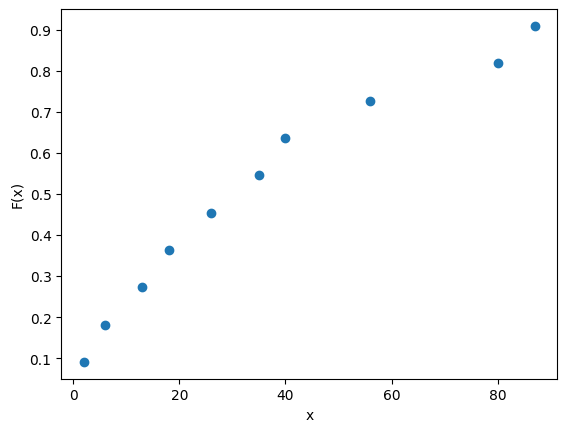

In [60]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

## 複数製品をループで処理する
pythonなどのメリットは一度できた処理の繰り返しにある。  
ここまでの処理を製品ごとにループさせる。  
pythonでもfor文は使用可能，c言語などとの違いは，数列などのリストを与えて，順番に取り出して実行する点。  
通常の感覚で使用するには，rangeメソッドで生成した数列を代入する必要がある。

In [61]:
i_list = range(1,5+1)
print(i_list[0])

1


productA


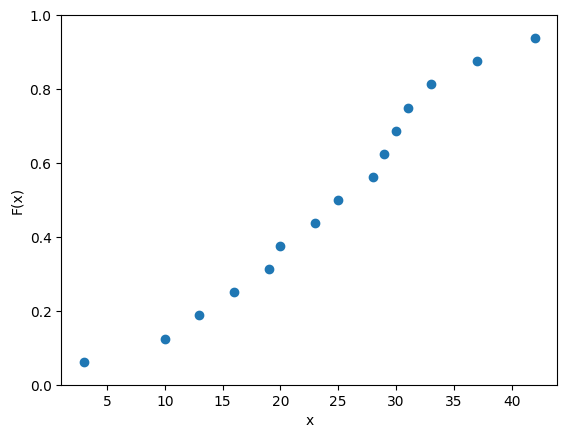

productB


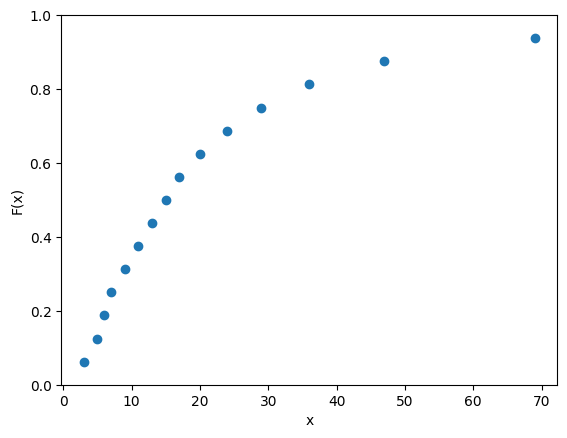

productC


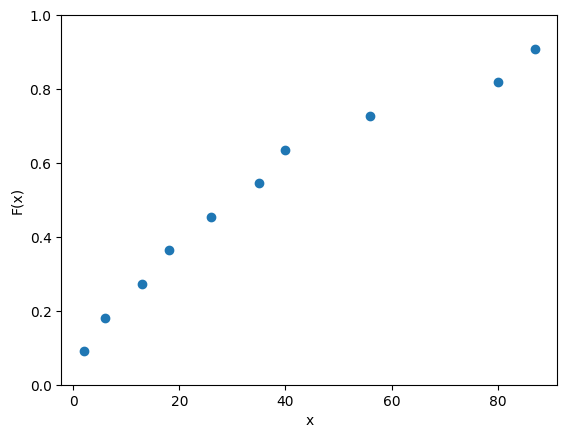

productD


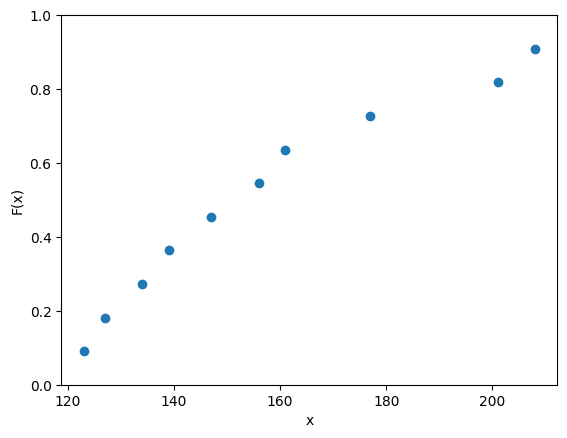

productE


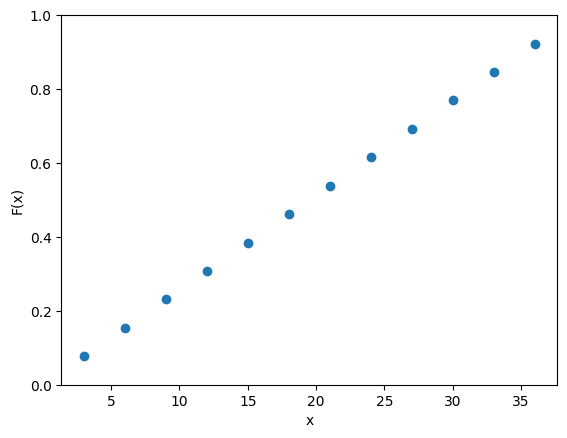

In [62]:
for i in range(1,5+1):
    #製品名を表示
    print(df.columns[i])
    #データ処理を２行にまとめる 
    data = np.array(df.iloc[:,[i]]).squeeze()
    x = data[~np.isnan(data)]
    #ランク法の計算
    y = np.arange(1,len(x)+1) / (len(x)+1)
    #グラフ表示
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.ylim(0,1) #軸の表示範囲を設定
    plt.show()

plt.show()の前にplt.plot()を複数回実行すれば，複数データを同じ図で描画できる。

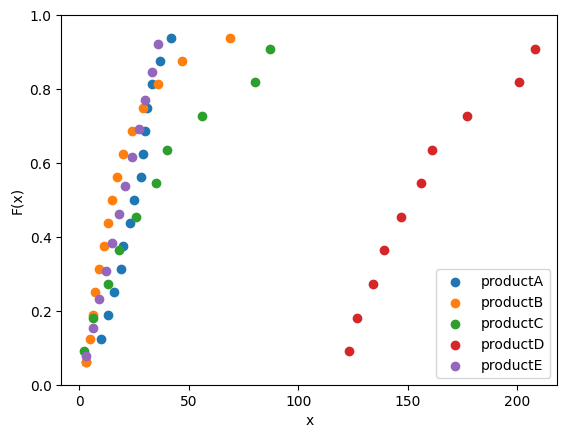

In [63]:
for i in range(1,5+1):
    data = np.array(df.iloc[:,[i]]).squeeze()
    x = data[~np.isnan(data)]
    y = np.arange(1,len(x)+1) / (len(x)+1)
    #ラベル付きでグラフに書き込み
    plt.scatter(x, y, label=df.columns[i])
#ループ後一括で表示
plt.legend() #設定したラベルを注釈として表示
plt.xlabel('x')
plt.ylabel('F(x)')
plt.ylim(0,1) #軸の表示範囲を設定
plt.show()

# レポート課題１
表１のデータX_AからX_Eについて，指定されたランク法（対象試料累積分布（iさん…）メディアンランク法（Tさん…）で累積分布プロットを作成せよ。
